<a href="https://colab.research.google.com/github/shravani-01/Sales-Conversion-Analysis/blob/main/Sales_Conversion_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns

import os

In [ ]:
df=pd.read_csv("KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


I have extracted the first five records of the dataset for my reference.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


This shows that all the columns in the dataset do not have null values.

In [ ]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


Count: Tell the number of rows in the data set 
mean: Mean of the values in that column 
std: Standared deviation of values in that column min max: Minimum and maximum value of that column 25%, 50% and 70% : This value show the 25th, 50th, and 75th percentiles.

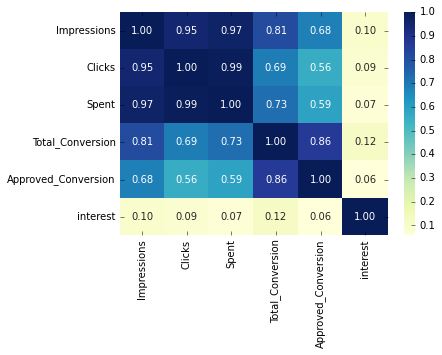

In [ ]:
#Correlation Matrix
g=sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion","interest"]].corr(),annot=True ,fmt=".2f", cmap="YlGnBu")
g

Impressions: the number of times the ad was shown.

Total conversion: Total number of people who enquired about the product after seeing the ad.

Approved conversion: Total number of people who bought the product after seeing the ad.

From the heat map, we can conclude that the correlation value for impression and total conversion is high as comapared to corrrelation between impression and approved conversion. Through this we can interpret that when the ad is shown multiple time to the people they enquire that product out for sure.

In [ ]:
df["xyz_campaign_id"].replace({916:"C_1",936:"C_2",1178:"C_3"}, inplace=True)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,Campaign_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,Campaign_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,Campaign_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,Campaign_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,Campaign_1,103928,30-34,M,28,4133,1,1.29,1,1


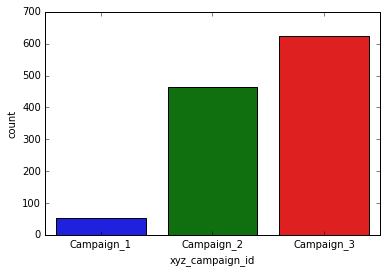

In [ ]:
# count plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = df) 
plt.show() 

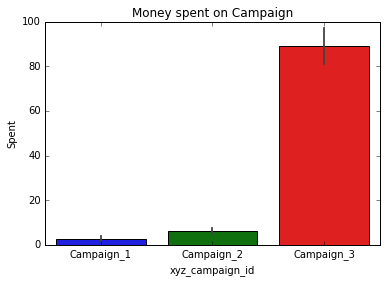

In [ ]:
sns.barplot(x="xyz_campaign_id",y= "Spent",data = df).set_title("Money spent on Campaign")
plt.show()

From this, we can infer that the ad campaign with id 1178 was done most of the time compared to the other campaigns.
Also, money spent on camapaign with campaign id 1178 is almost 4 times of the other two campaign.

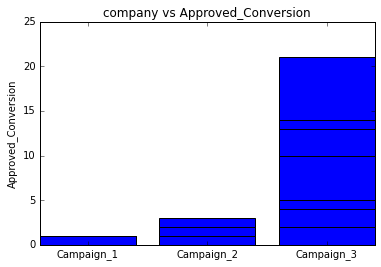

In [ ]:
#bar plot
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("company vs Approved_Conversion")
plt.show()

This shows that maximum number of people bought the product after seeing the ad campaign with id 1178.

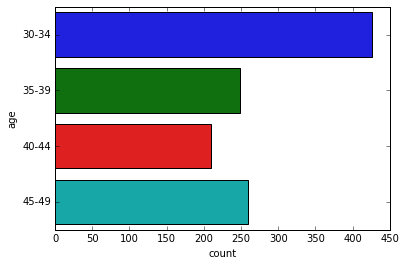

In [ ]:
#count plot determining the majority of age group
sns.countplot(y ='age', data = df) 
plt.show() 


This shows that majority of the people belong to the age group 30-34.

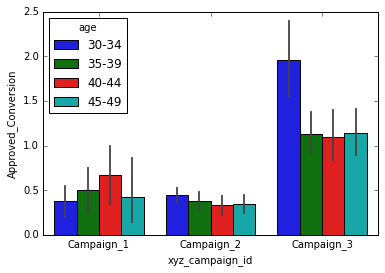

In [ ]:
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=df)

This infers that people belonging to the 30-34 age group has bought more products after seeing the ad from the campaign 1178

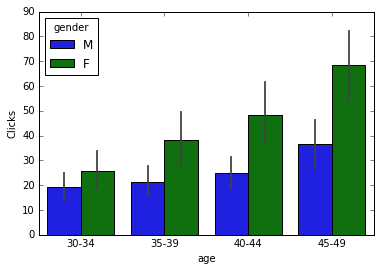

In [ ]:
sns.barplot(x="age",y="Clicks", data = df, hue= "gender")


Here, majority of females belonging to the age group 45-49 have clicked more on the ad. However, the approved conversion for that age group is very less compared to 30-34 age group.

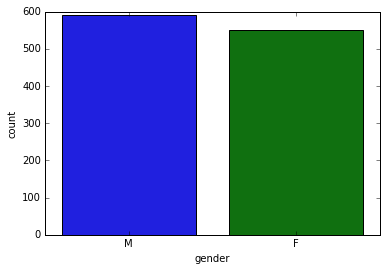

In [ ]:
#count plot determining the gender count
sns.countplot(x ='gender', data = df) 
# Show the plot 
plt.show() 

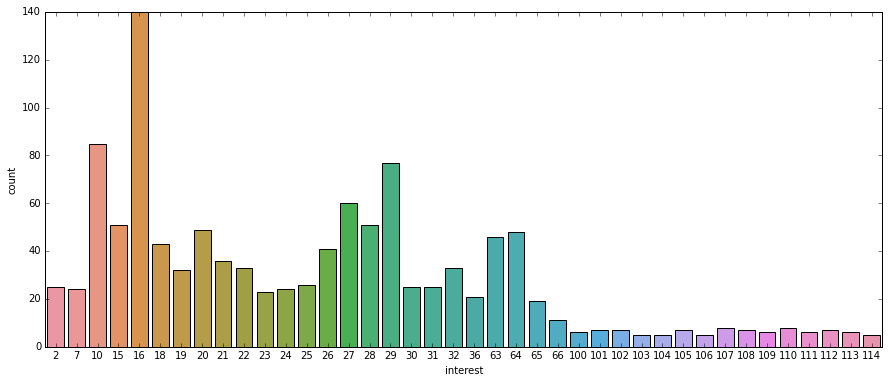

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x ='interest', data = df) 
# Show the plot 
plt.show() 

This shows that people are not very interested in the categories beyond 100.

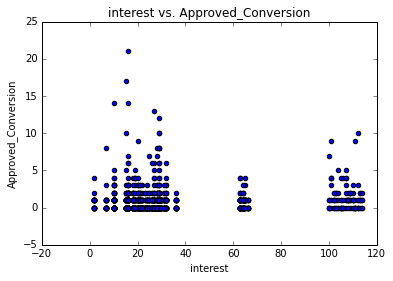

In [ ]:
plt.scatter(df["interest"], df["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

Even though, people are not very interested in the categories between 100 and 120, they still buy those products.

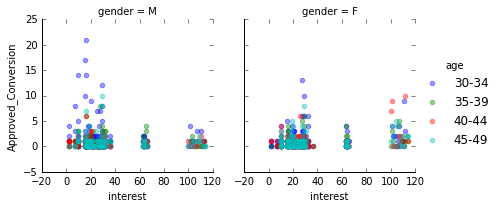

In [ ]:
g = sns.FacetGrid(df, col="gender",hue = 'age')
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

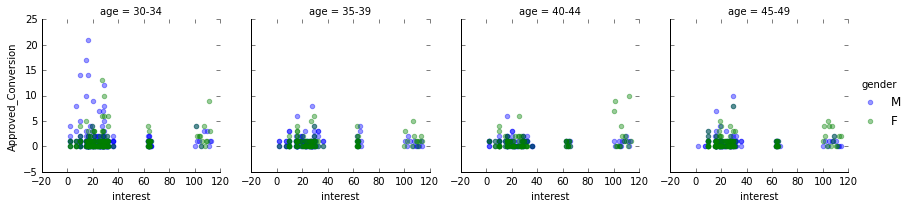

In [ ]:
g = sns.FacetGrid(df, col="age",hue = 'gender')
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

From the above two graphs, we can say that people belonging to all age group irrespective of the gender, are more interested and buy products belonging to the categories between 1 and 40. 


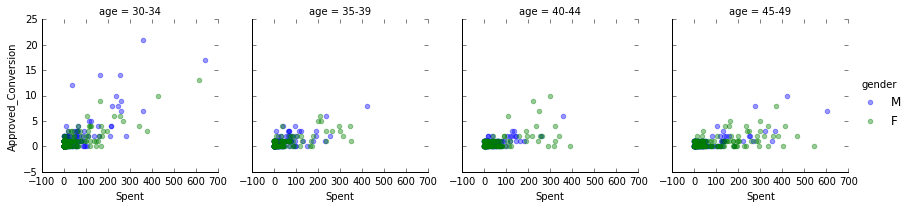

In [ ]:
g = sns.FacetGrid(df, col="age",hue = 'gender')
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
g.add_legend();

SUMMARY:

1. We can see that the campaign id 1178 is attracting many people to buy their products. The same strategy should be followed by other  campaigns to reach the highest conversion rate possible.

2. Majority of females belonging to the age group 45-49 have clicked more on the ad. However, the approved conversion for that age group is very less compared to 30-34 age group. This might be due to less awareness on how to buy the product as they are the oldest age group. Giving step by step instructions could increase the approved conversion rates proportional to the click-through rates.

3. The future Social campaigns should target the older age group and also recommend them the products similar to what they clicked.

4. As mentioned earlier, the campaign analysis showed that the third campaign 1178 follows a strategy that attracts most of the customers from all age groups.
Both the genders shows similar interests in all three campaigns.

Campaign_3:

Campaign_3 has most number of ads.
Campaign_3 has best Approved_conversion count.

Age_group: In Campaign_3 and Campaign_2, the age group of 30-34 shows more interest whereas in Campaign_1 the age group of 40-44 shows more interest.

gender:Both the genders shows similar interests in all three campaigns.

interest:Although the count of interest after 100 is less,there is a rise of users after 100 who actually bought the product as predicted earlier from the analysis.
